In [55]:
import sys
sys.path.append('../scripts')
import analysis
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from analysis import calculateTechnicalIndicator , analysisClosingPriceWithDate , technicalIndicatorsVsClosingPrice ,closingPriceRelativeStrengthIndex ,  closingPriceMovingAverageConvergenceDivergence 

In [3]:
def load(path):
    """
    Load the dataset from a CSV file and return it as a pandas DataFrame.
    """
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [20]:
def missingValuesDrop(df):
    print(df.isnull().sum())
    print("drop rows with any NaN values")
    df.dropna(inplace=True)
    print(df.isnull().sum())


In [12]:
stock_data_aapl = load("../src/data/AAPL_historical_data.csv")
stock_data_goog = load("../src/data/GOOG_historical_data.csv")
stock_data_amzn = load("../src/data/AMZN_historical_data.csv")
stock_data_msft = load("../src/data/MSFT_historical_data.csv")
stock_data_nvda = load("../src/data/NVDA_historical_data.csv")
stock_data_tsla = load("../src/data/TSLA_historical_data.csv")
stock_data_meta = load("../src/data/META_historical_data.csv")

In [13]:
stock_data_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [14]:
stock_data_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB


* Analysis Closing PriceWithDate

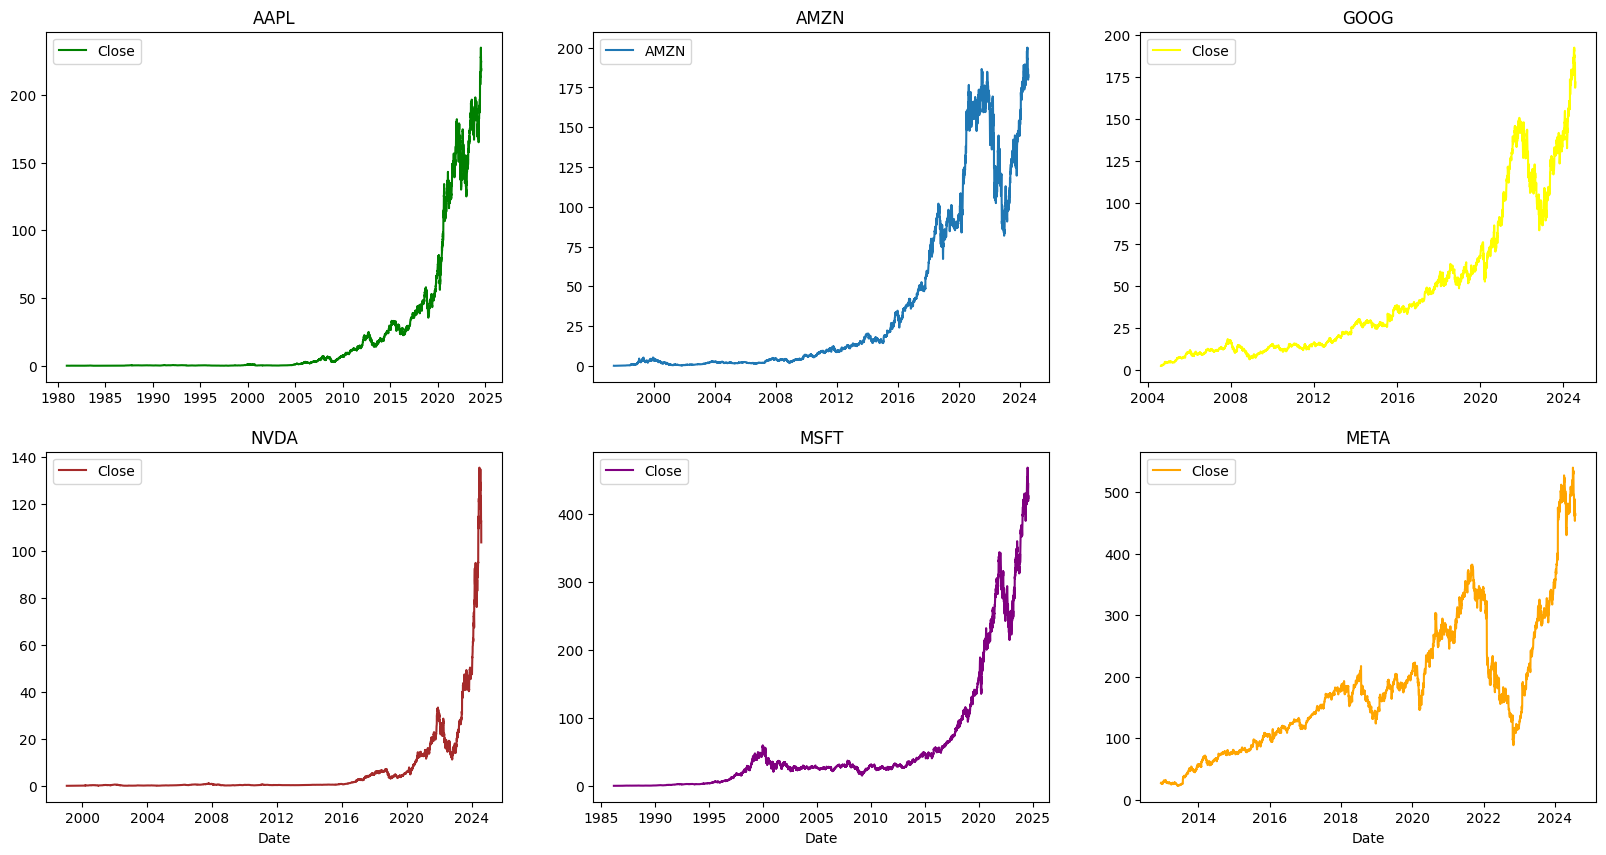

In [15]:
analysisClosingPriceWithDate(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

* TA-Lib - Technical Analysis

For AAPL

In [16]:
calculateTechnicalIndicator(stock_data_aapl)
stock_data_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [17]:
missingValuesDrop(stock_data_aapl)

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Dividends        0
Stock Splits     0
SMA             19
RSI             14
EMA             19
MACD            33
MACD_Signal     33
dtype: int64


For AMZN

In [19]:
calculateTechnicalIndicator(stock_data_amzn)
stock_data_amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [21]:
missingValuesDrop(stock_data_amzn)

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Dividends        0
Stock Splits     0
SMA             19
RSI             14
EMA             19
MACD            33
MACD_Signal     33
dtype: int64
drop rows with any NaN values
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
SMA             0
RSI             0
EMA             0
MACD            0
MACD_Signal     0
dtype: int64


For Goog

In [22]:
calculateTechnicalIndicator(stock_data_goog)
stock_data_goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [31]:
missingValuesDrop(stock_data_goog)

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Dividends        0
Stock Splits     0
SMA             19
RSI             14
EMA             19
MACD            33
MACD_Signal     33
dtype: int64
drop rows with any NaN values
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
SMA             0
RSI             0
EMA             0
MACD            0
MACD_Signal     0
dtype: int64


For Meta

In [24]:
calculateTechnicalIndicator(stock_data_meta)
stock_data_meta.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [25]:
missingValuesDrop(stock_data_meta)

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Dividends        0
Stock Splits     0
SMA             19
RSI             14
EMA             19
MACD            33
MACD_Signal     33
dtype: int64
drop rows with any NaN values
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
SMA             0
RSI             0
EMA             0
MACD            0
MACD_Signal     0
dtype: int64


For Msft

In [26]:
calculateTechnicalIndicator(stock_data_msft)
stock_data_msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [27]:
missingValuesDrop(stock_data_msft)

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Dividends        0
Stock Splits     0
SMA             19
RSI             14
EMA             19
MACD            33
MACD_Signal     33
dtype: int64
drop rows with any NaN values
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
SMA             0
RSI             0
EMA             0
MACD            0
MACD_Signal     0
dtype: int64


For NVDA

In [28]:
calculateTechnicalIndicator(stock_data_nvda)
stock_data_nvda.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,RSI,EMA,MACD,MACD_Signal
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [30]:
missingValuesDrop(stock_data_nvda)

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Dividends        0
Stock Splits     0
SMA             19
RSI             14
EMA             19
MACD            33
MACD_Signal     33
dtype: int64
drop rows with any NaN values
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
SMA             0
RSI             0
EMA             0
MACD            0
MACD_Signal     0
dtype: int64


* Visual represent the relationship between technical indicators and closing price.

Closing price VS Simple Moving Average(SMA)

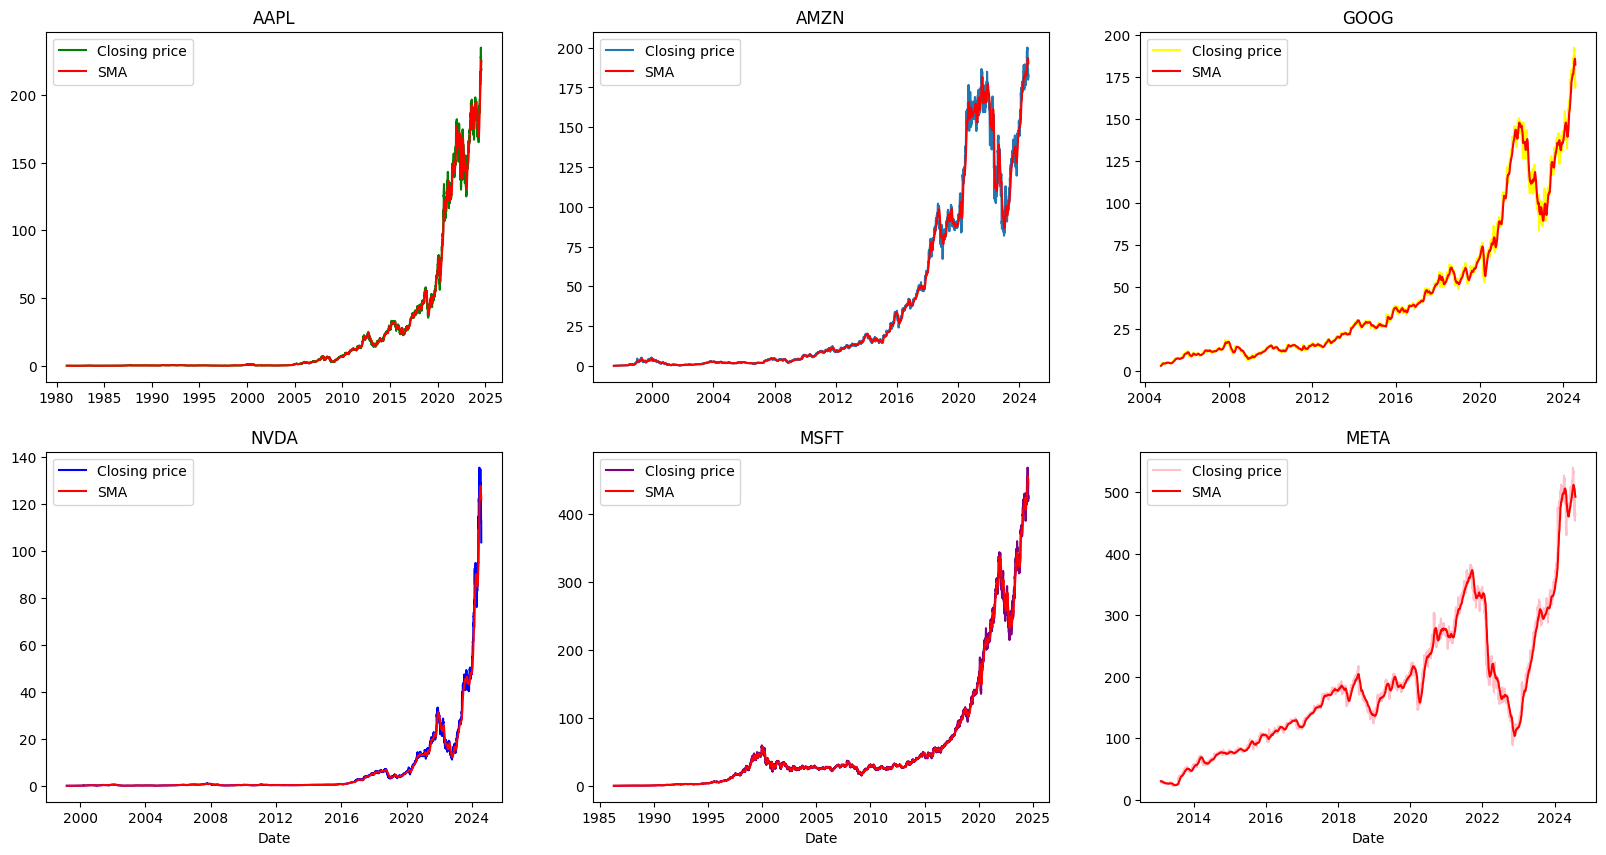

In [34]:
technicalIndicatorsVsClosingPrice(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,'SMA')

* Closing price VS Moving Average Convergence Divergence (MACD) Indicator

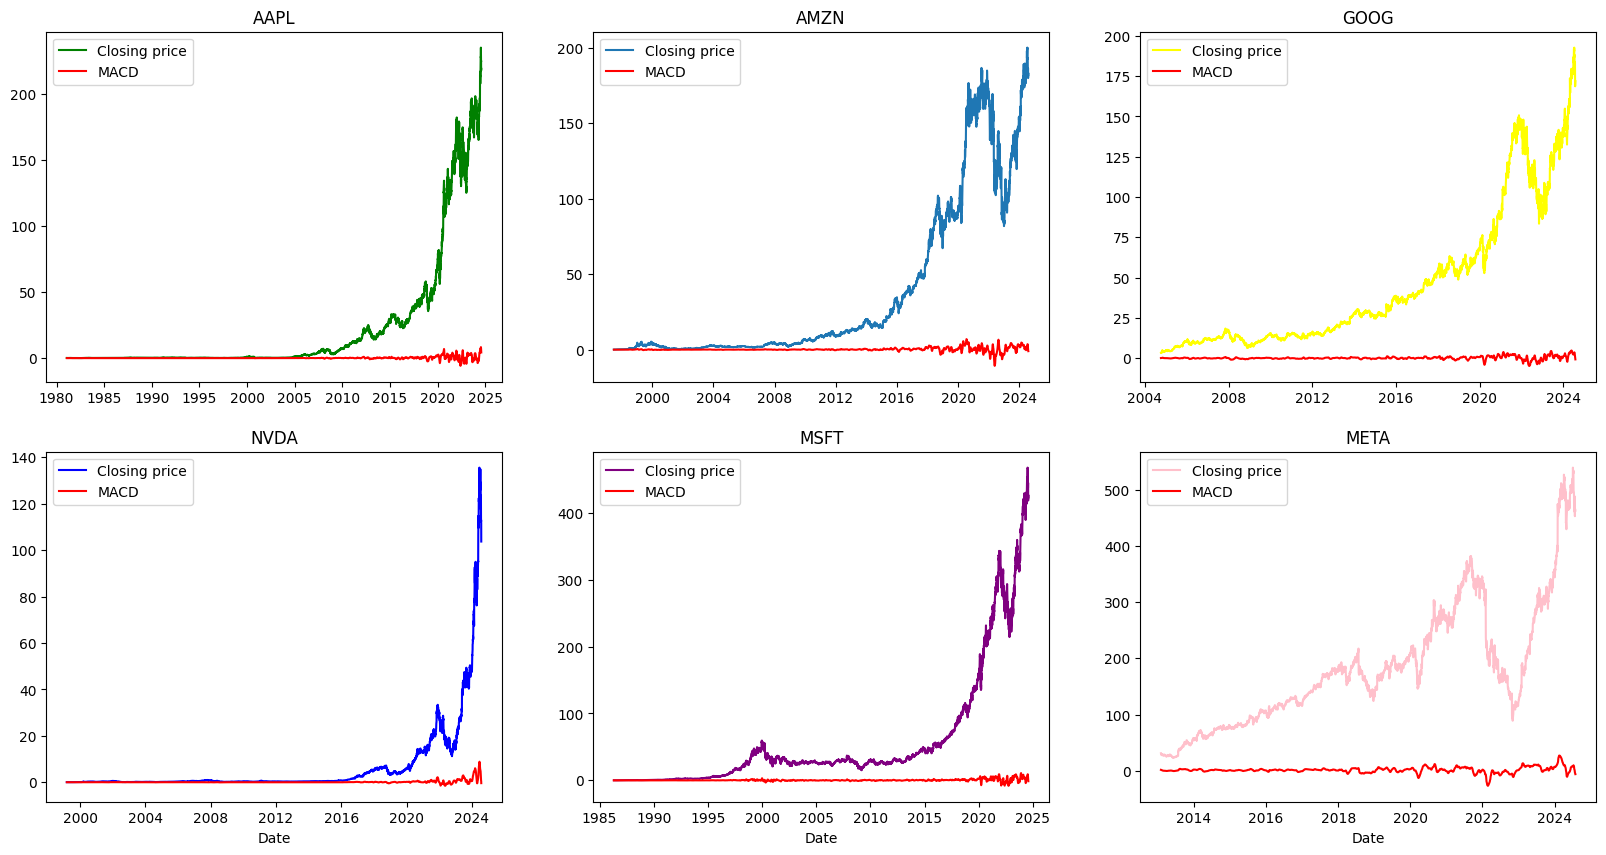

In [35]:
technicalIndicatorsVsClosingPrice(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,"MACD")

* Closing Price vs. Exponential Moving Average (EMA)

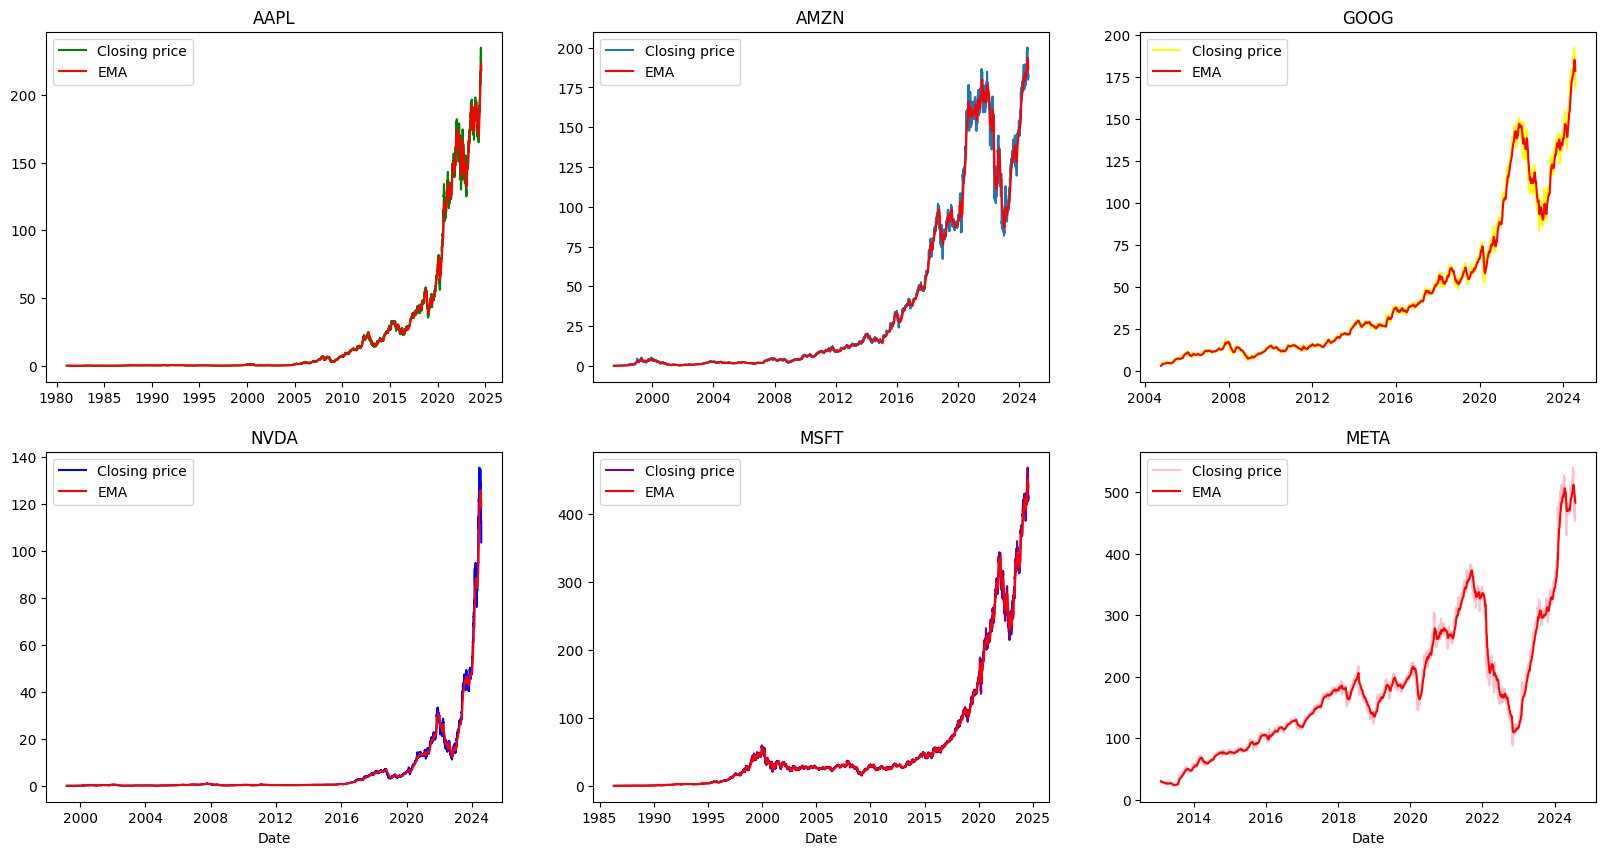

In [36]:
technicalIndicatorsVsClosingPrice(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda,'EMA')

* Closing Price vs. Relative Strength Index(RSI)

c:\Users\Sintayehu-PC\Desktop\TENX\Predicting-Price-Moves-with-News-Sentiment\notebooks\../scripts\analysis.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


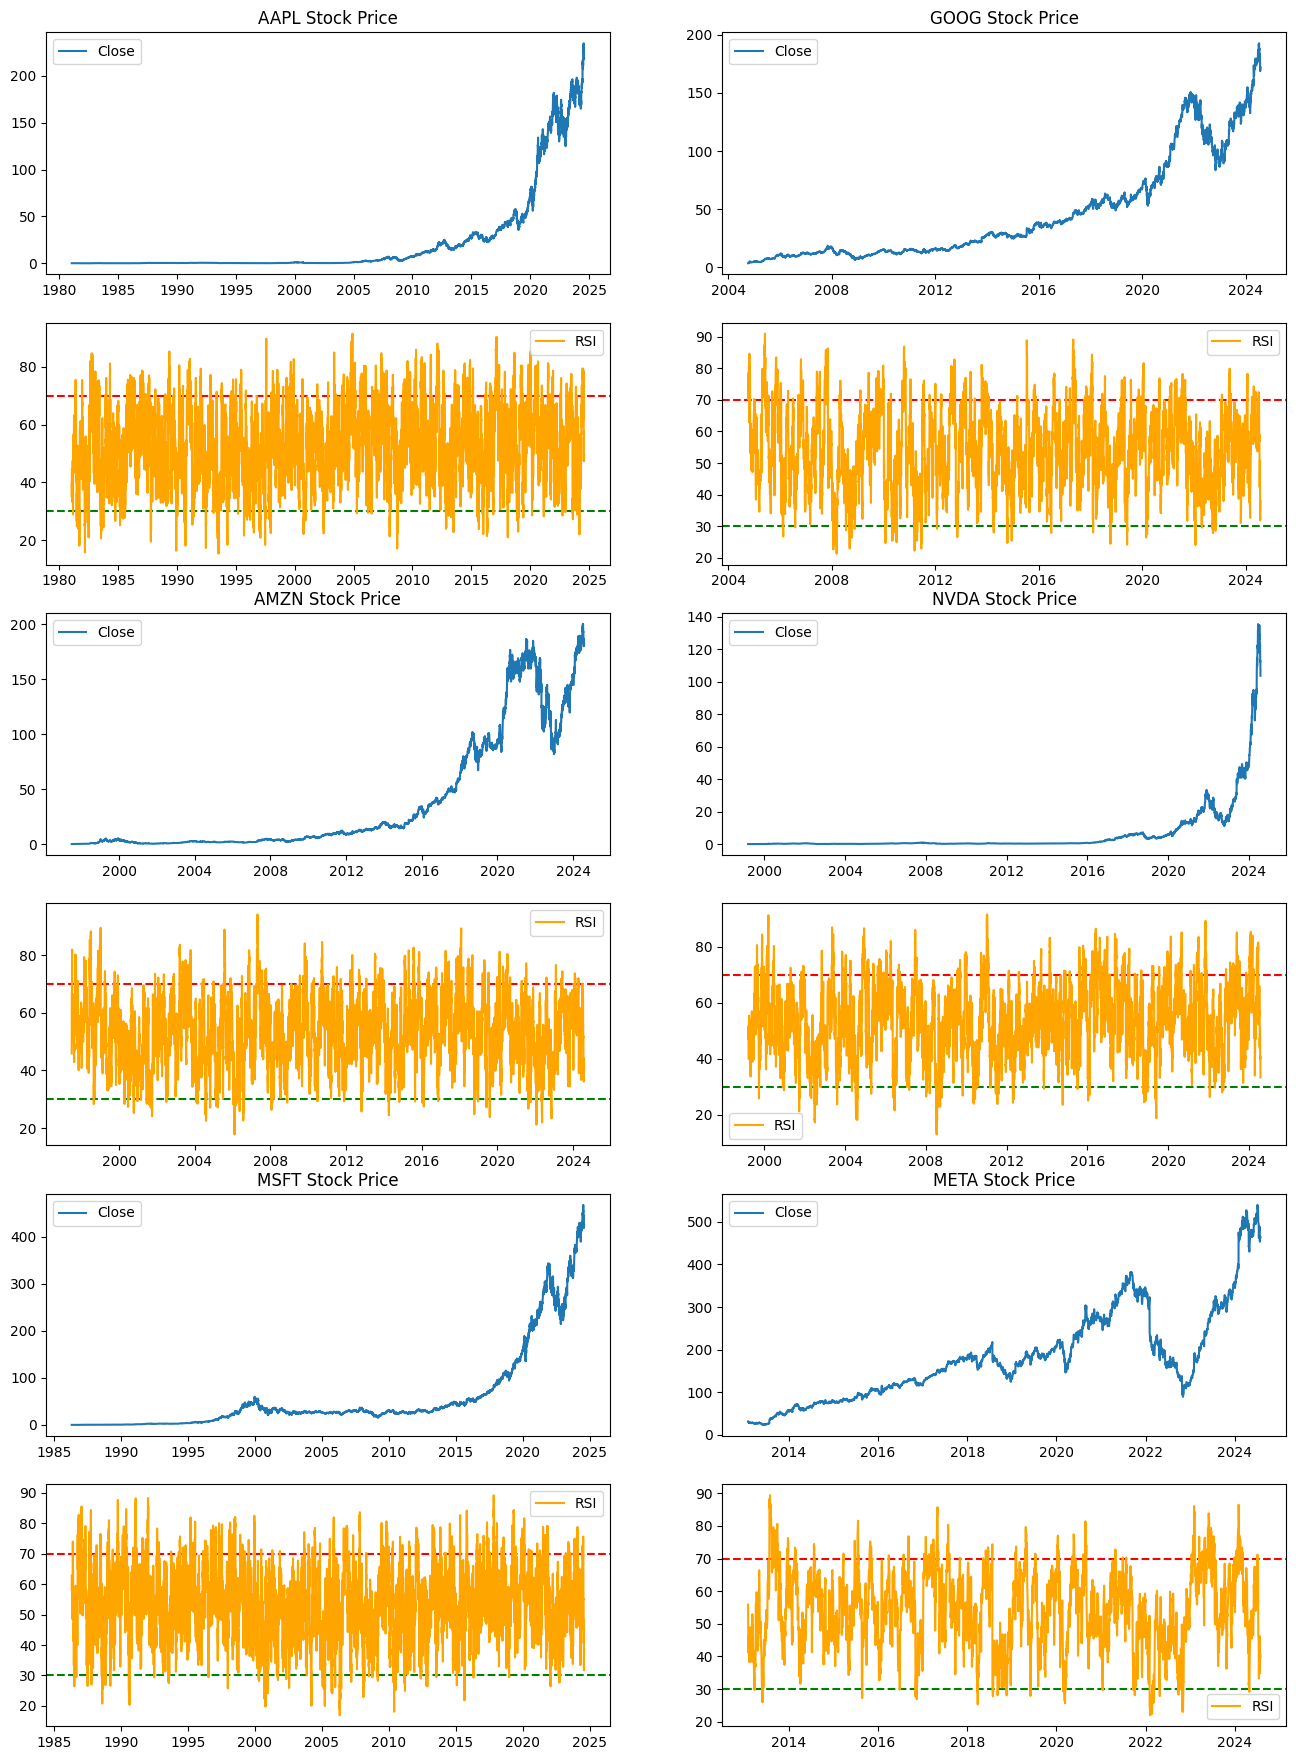

In [39]:
closingPriceRelativeStrengthIndex(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

* Closing Price vs. Moving Average Convergence Divergence (MACD)

c:\Users\Sintayehu-PC\Desktop\TENX\Predicting-Price-Moves-with-News-Sentiment\notebooks\../scripts\analysis.py:257: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


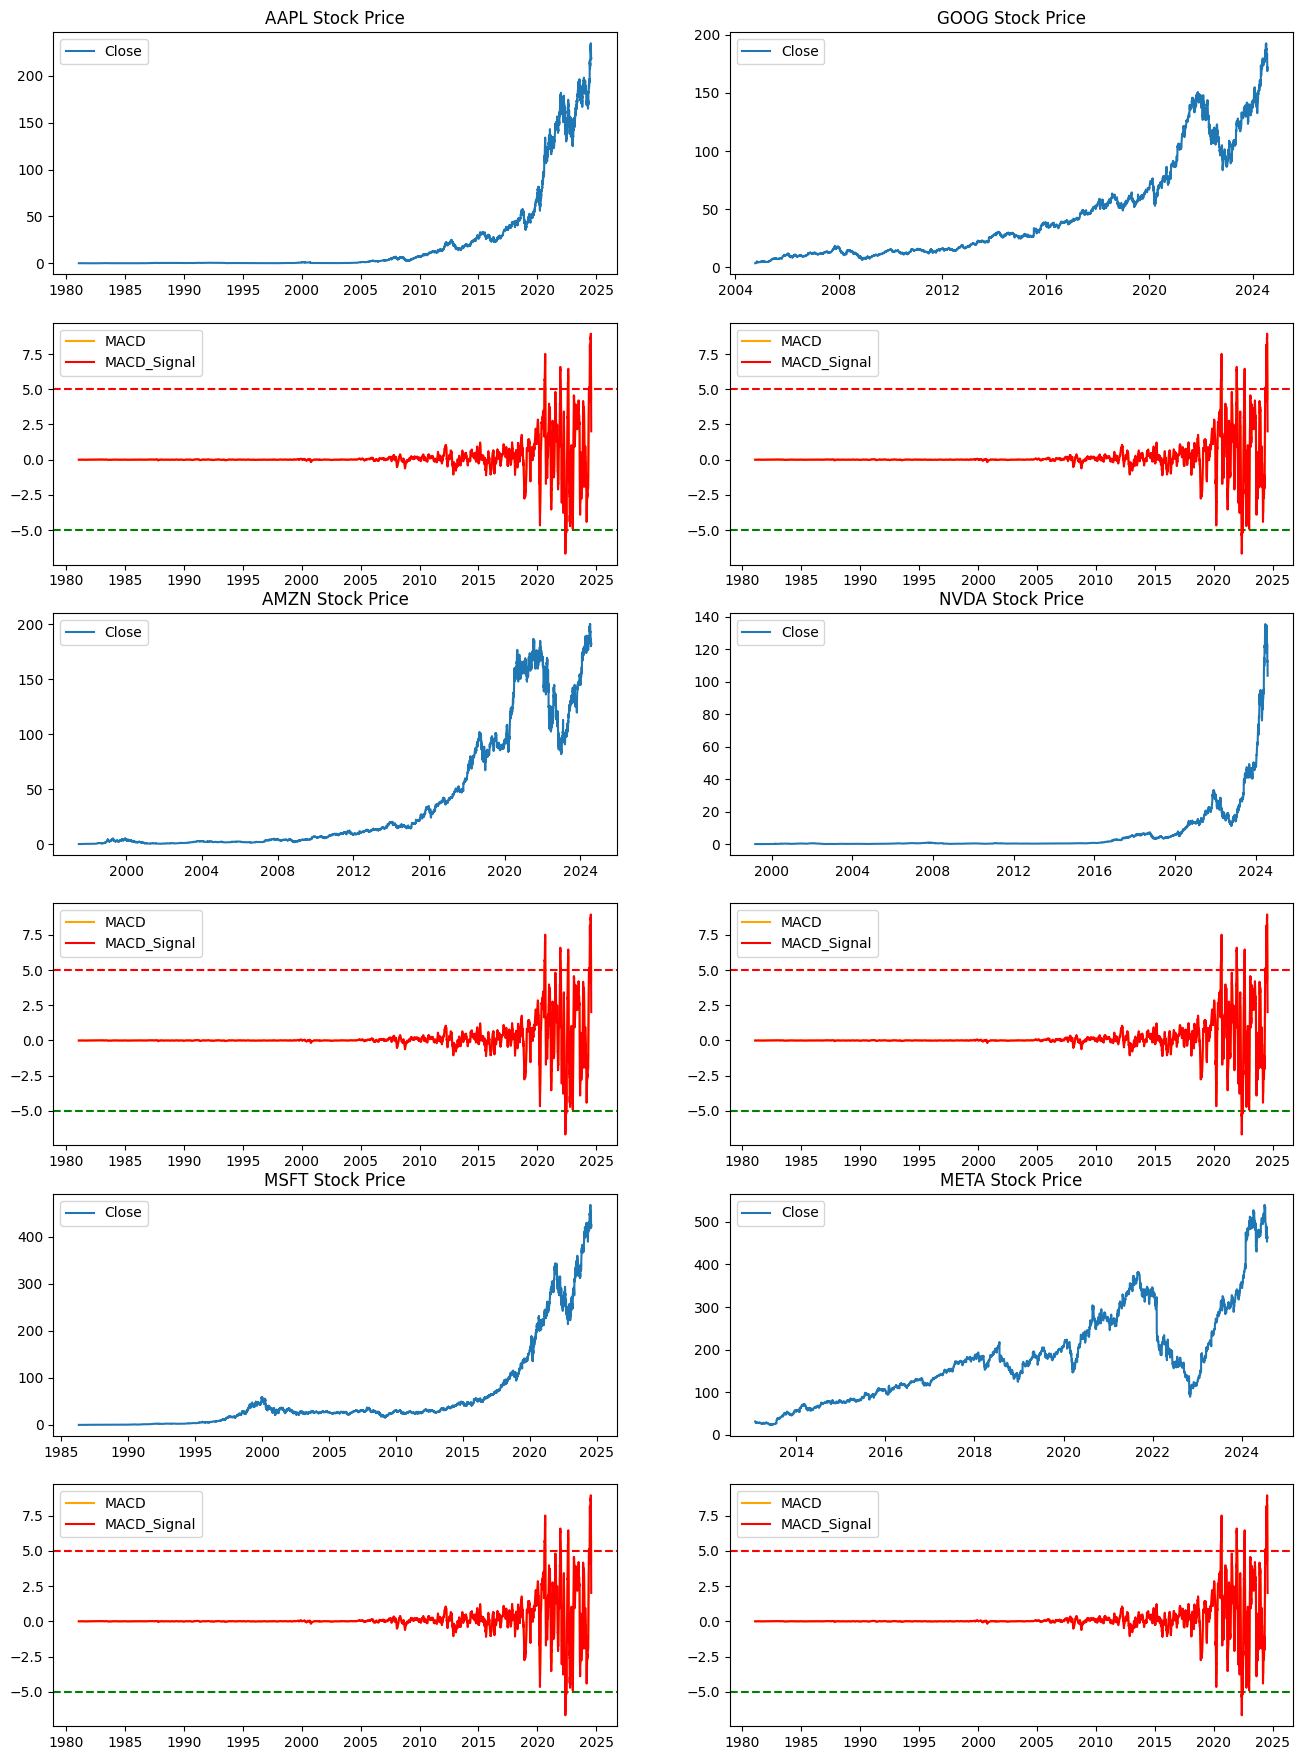

In [38]:
closingPriceMovingAverageConvergenceDivergence(stock_data_aapl,stock_data_amzn,stock_data_goog,stock_data_meta,stock_data_msft,stock_data_nvda)

* Financial Metrics

* Correlation between news sentiment and stock price

In [113]:
df_news = pd.read_csv("../src/data/processed/news_data.csv")

In [114]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   headline              1407328 non-null  object 
 1   url                   1407328 non-null  object 
 2   publisher             1407328 non-null  object 
 3   date                  1407328 non-null  object 
 4   stock                 1407328 non-null  object 
 5   days_of_week          1407328 non-null  object 
 6   publication_hour      1407328 non-null  int64  
 7   sentiment_score       1407328 non-null  float64
 8   sentiment_score_word  1407328 non-null  object 
 9   domain                8088 non-null     object 
 10  headline_length       1407328 non-null  int64  
 11  publication_date      1407328 non-null  object 
 12  topic                 1407328 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 139.6+ MB


In [115]:
df_news['Date'] = pd.to_datetime(df_news['publication_date'])

* Replacing sentiment with average daily sentiment per stock

In [116]:
df_news["aggregate_sentiment"] = df_news.groupby(["Date", "stock"])["sentiment_score"].transform("mean")
df_news.drop(columns=['sentiment_score'], inplace=True)

In [117]:
df_news.head()

,headline,url,publisher,date,stock,days_of_week,publication_hour,sentiment_score_word,domain,headline_length,publication_date,topic,Date,aggregate_sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Friday,10,neutral,NaN,39,2020-06-05,Other,2020-06-05,0.000000
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Wednesday,10,neutral,NaN,42,2020-06-03,Other,2020-06-03,0.000000
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Tuesday,4,neutral,NaN,29,2020-05-26,Other,2020-05-26,0.000000
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Friday,12,neutral,NaN,44,2020-05-22,Other,2020-05-22,0.027778
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Friday,11,neutral,NaN,87,2020-05-22,Price Target,2020-05-22,0.027778


* Mergeing the news data with stock data

In [118]:
def mergeStockAndNews(stock_data, df_news , ticker):
    """
    Merge stock data with news data based on the 'Date' column and add daily return.
    """
    data_to_merge = df_news[df_news['stock'] == ticker]
    merged_data = data_to_merge.merge(stock_data, how='inner', on='Date')
    merged_data['stock_return'] = merged_data['Close'].pct_change()
    
    return merged_data

In [129]:
mergeStockAndNews_amzn  = mergeStockAndNews(stock_data_amzn, df_news, 'AMZN')
mergeStockAndNews_goog  = mergeStockAndNews(stock_data_goog, df_news, 'GOOG')   
mergeStockAndNews_meta  = mergeStockAndNews(stock_data_meta, df_news, 'FB')
mergeStockAndNews_msft  = mergeStockAndNews(stock_data_msft, df_news, 'MSF')
mergeStockAndNews_nvda  = mergeStockAndNews(stock_data_nvda, df_news, 'NVDA')
mergeStockAndNews_tsla  = mergeStockAndNews(stock_data_tsla, df_news, 'TSLA')
mergeStockAndNews_aapl = mergeStockAndNews(stock_data_aapl, df_news, 'AAPL')


* Plot the Correlation between aggregate sentiment and daily returns

In [139]:

def correlationDailyReturns(
    mergeStockAndNews_aapl,
    mergeStockAndNews_amzn,
    mergeStockAndNews_goog,
    mergeStockAndNews_meta,
    mergeStockAndNews_msft,
    mergeStockAndNews_nvda,
    corrwith
):
    # Compute correlation matrices
    correlation_aapl = mergeStockAndNews_aapl[[corrwith, 'stock_return']].corr()
    correlation_amzn = mergeStockAndNews_amzn[[corrwith, 'stock_return']].corr()
    correlation_goog = mergeStockAndNews_goog[[corrwith, 'stock_return']].corr()
    correlation_meta = mergeStockAndNews_meta[[corrwith, 'stock_return']].corr()
    correlation_msft = mergeStockAndNews_msft[[corrwith, 'stock_return']].corr()
    correlation_nvda = mergeStockAndNews_nvda[[corrwith, 'stock_return']].corr()
    
    # Plot setup: 3 rows x 2 columns
    fig, axs = plt.subplots(3, 2, figsize=(24, 15))

    sns.heatmap(correlation_aapl, annot=True, cmap='coolwarm', ax=axs[0, 0])
    axs[0, 0].set_title('AAPL: Sentiment vs Stock Return')

    sns.heatmap(correlation_amzn, annot=True, cmap='coolwarm', ax=axs[0, 1])
    axs[0, 1].set_title('AMZN: Sentiment vs Stock Return')

    sns.heatmap(correlation_goog, annot=True, cmap='coolwarm', ax=axs[1, 0])
    axs[1, 0].set_title('GOOG: Sentiment vs Stock Return')

    sns.heatmap(correlation_meta, annot=True, cmap='coolwarm', ax=axs[1, 1])
    axs[1, 1].set_title('META: Sentiment vs Stock Return')

    sns.heatmap(correlation_msft, annot=True, cmap='coolwarm', ax=axs[2, 0])
    axs[2, 0].set_title('MSFT: Sentiment vs Stock Return')

    sns.heatmap(correlation_nvda, annot=True, cmap='coolwarm', ax=axs[2, 1])
    axs[2, 1].set_title('NVDA: Sentiment vs Stock Return')

    plt.tight_layout()
    plt.show()


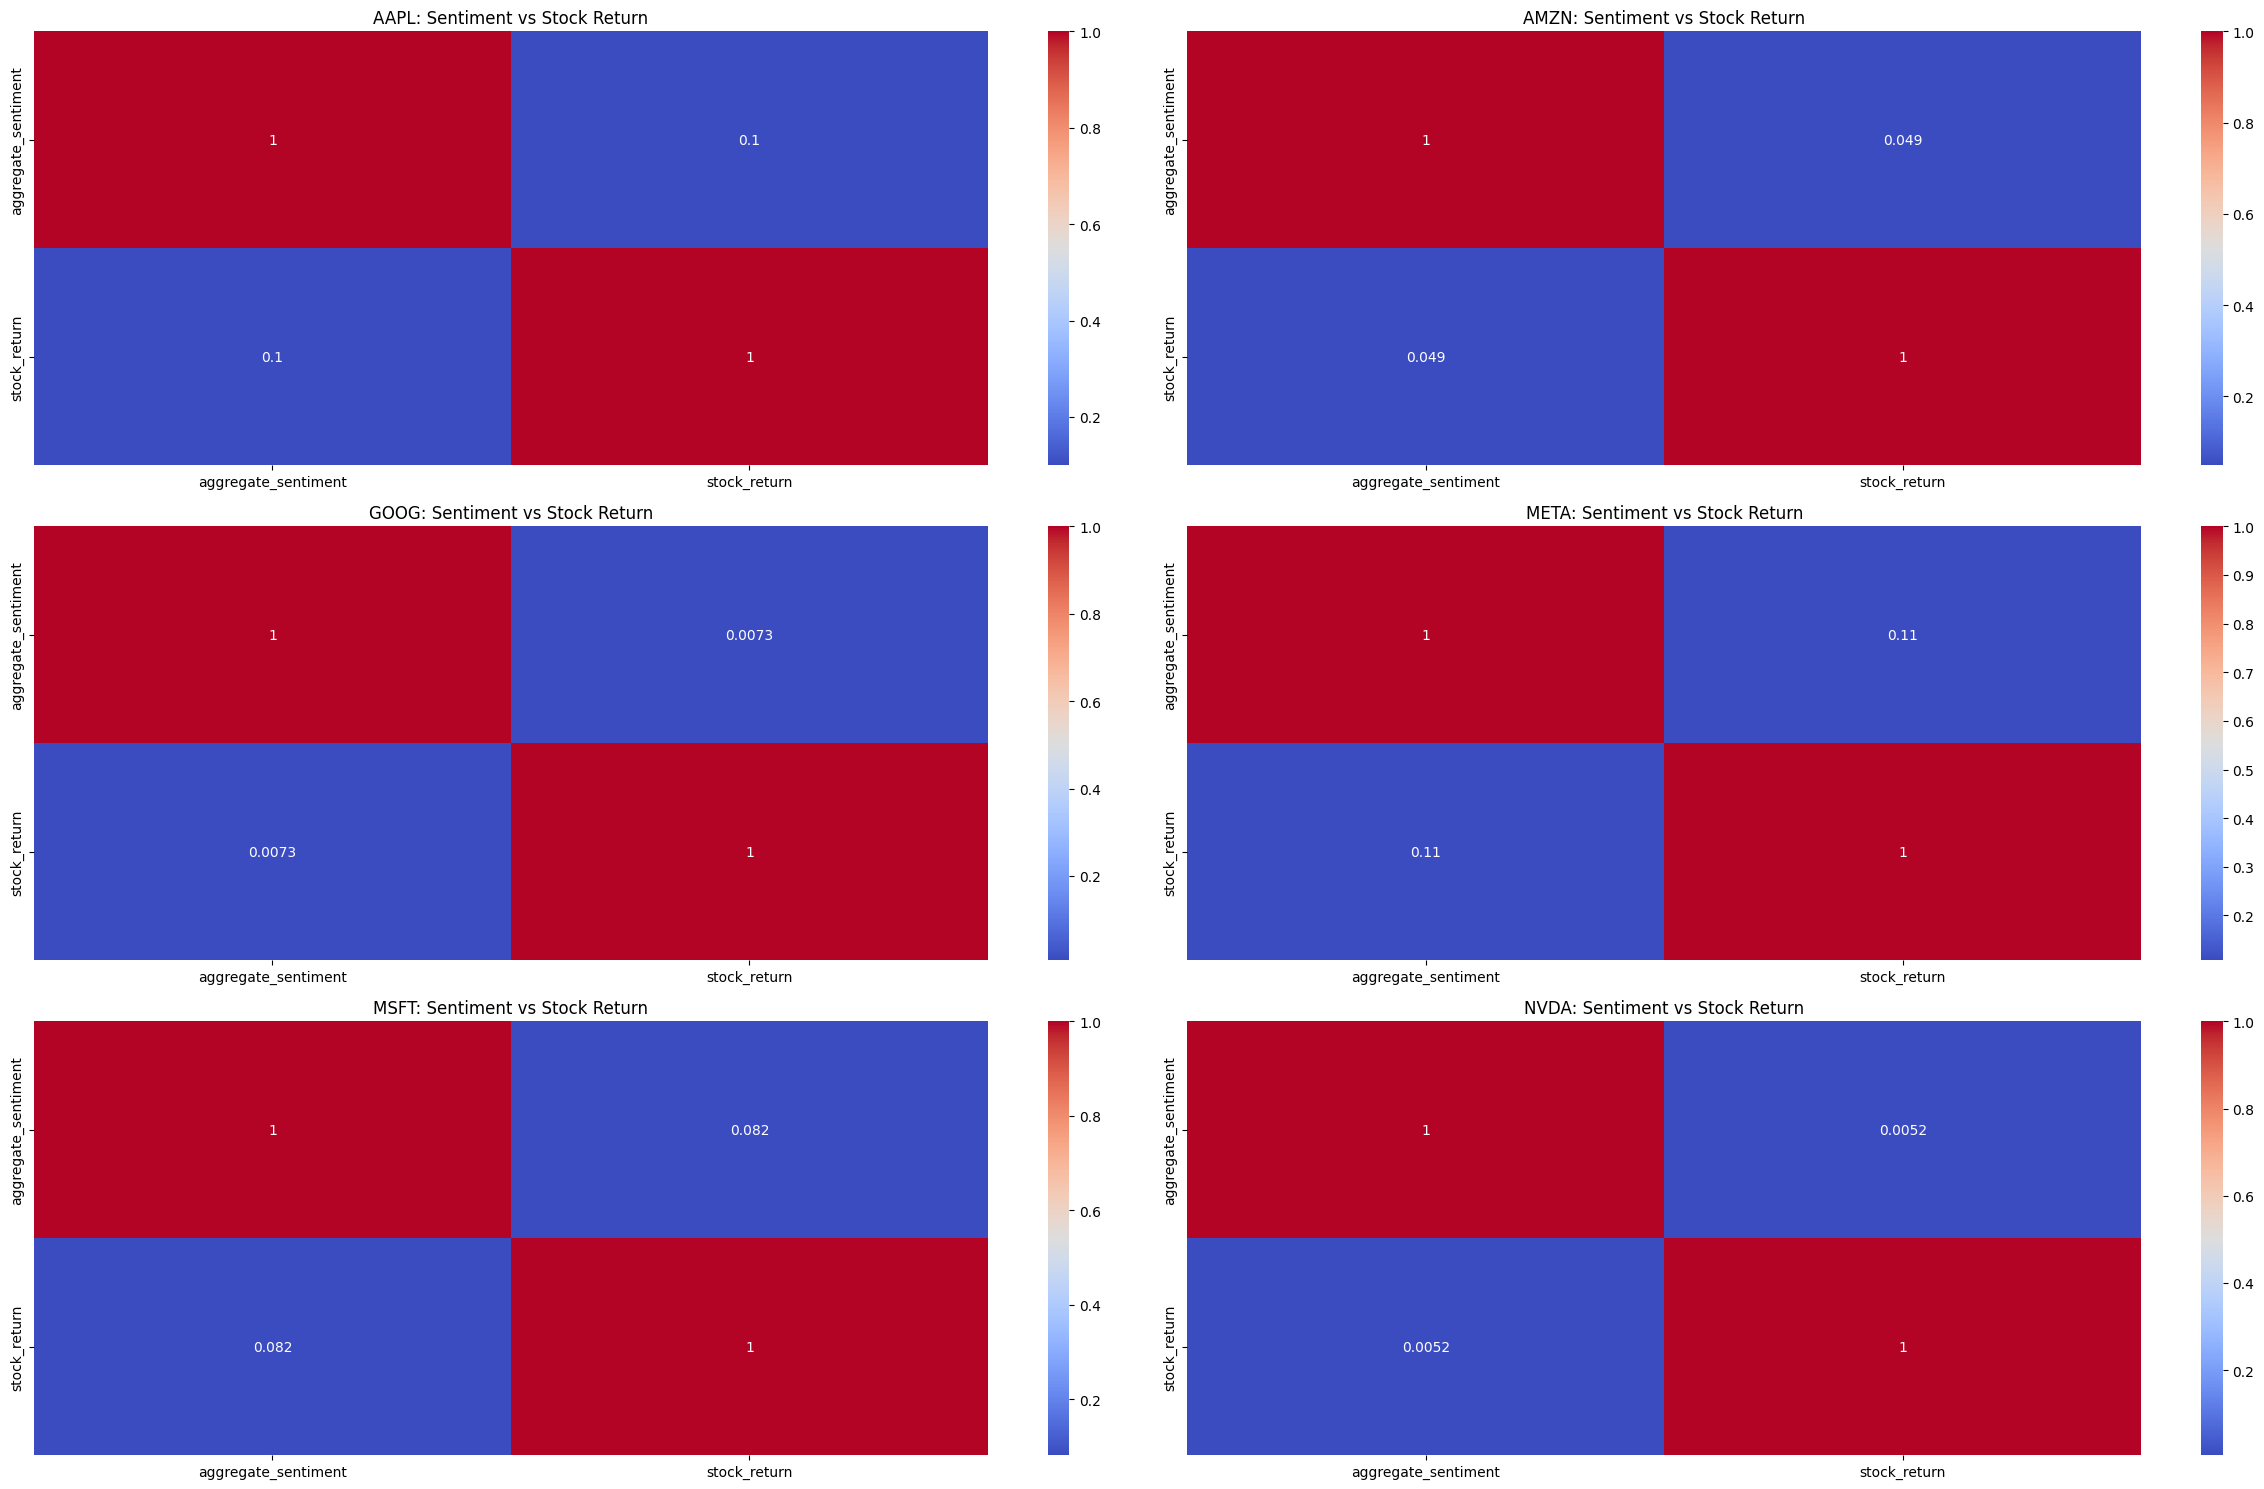

In [140]:
correlationDailyReturns(mergeStockAndNews_aapl, mergeStockAndNews_amzn, mergeStockAndNews_goog, mergeStockAndNews_meta, mergeStockAndNews_msft, mergeStockAndNews_nvda , 'aggregate_sentiment')

In [146]:
def plot_topic_vs_return(dataframe, stock_name):
    """
    Plots average stock return per topic for the given dataframe.
    
    Parameters:
        dataframe (pd.DataFrame): Merged stock and news data.
        stock_name (str): Name of the stock (used in the title).
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x='topic', y='stock_return', data=dataframe, estimator='mean', ci=None)
    plt.title(f'{stock_name.upper()}: Average Stock Return by Topic')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_24944\1765861326.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='topic', y='stock_return', data=dataframe, estimator='mean', ci=None)


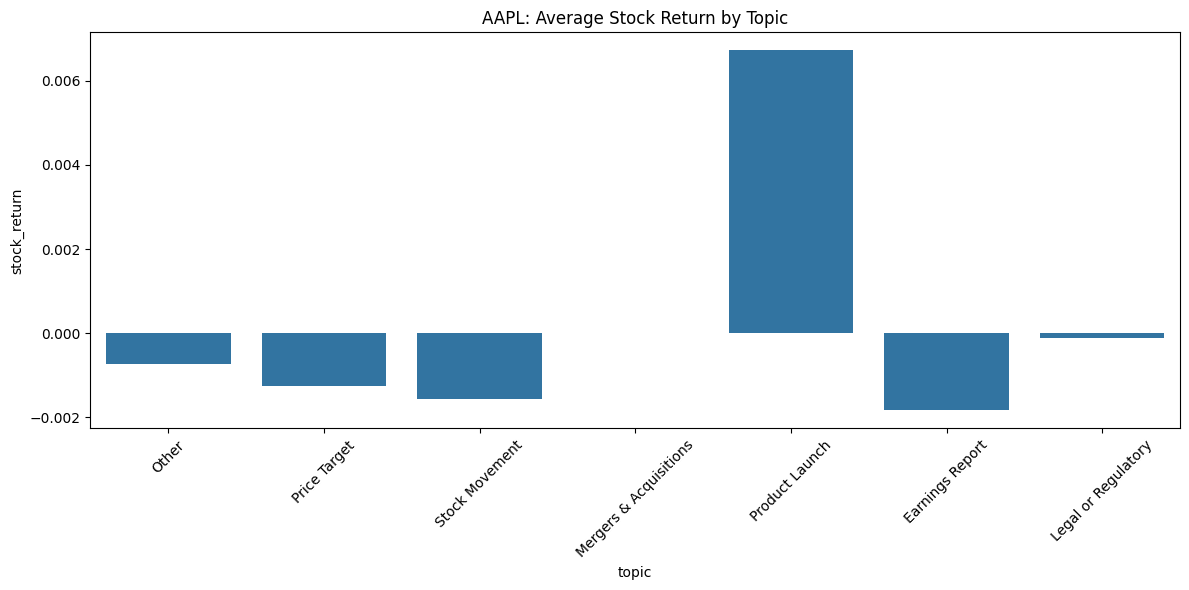

In [148]:
plot_topic_vs_return(mergeStockAndNews_aapl, 'AAPL')

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_24944\1765861326.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='topic', y='stock_return', data=dataframe, estimator='mean', ci=None)


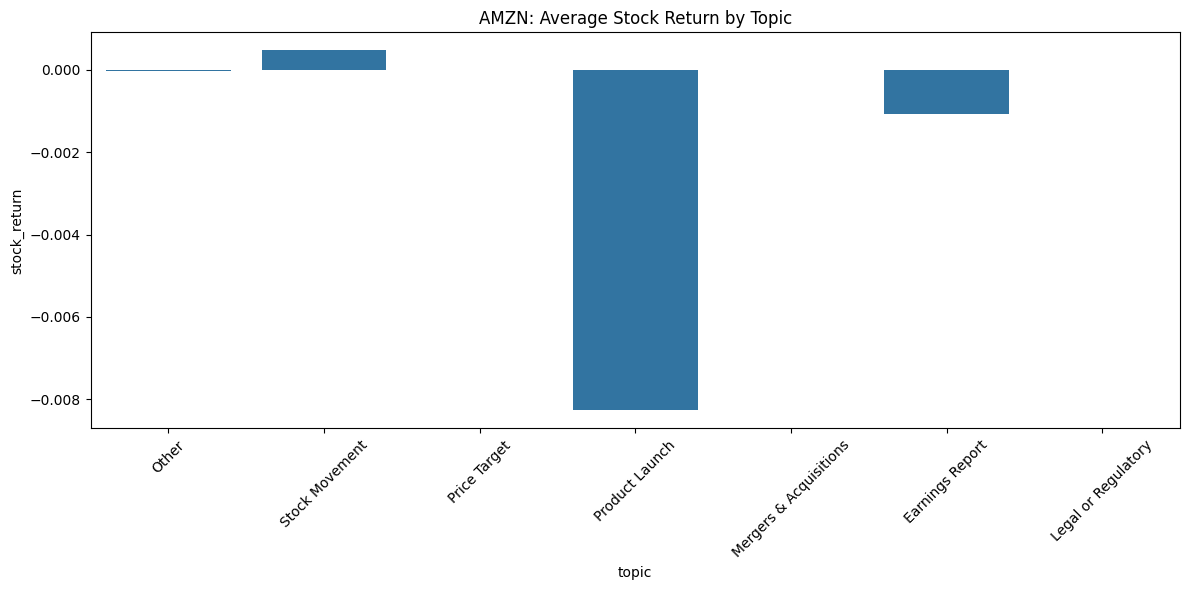

In [149]:
plot_topic_vs_return(mergeStockAndNews_amzn , 'AMZN')

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_24944\1765861326.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='topic', y='stock_return', data=dataframe, estimator='mean', ci=None)


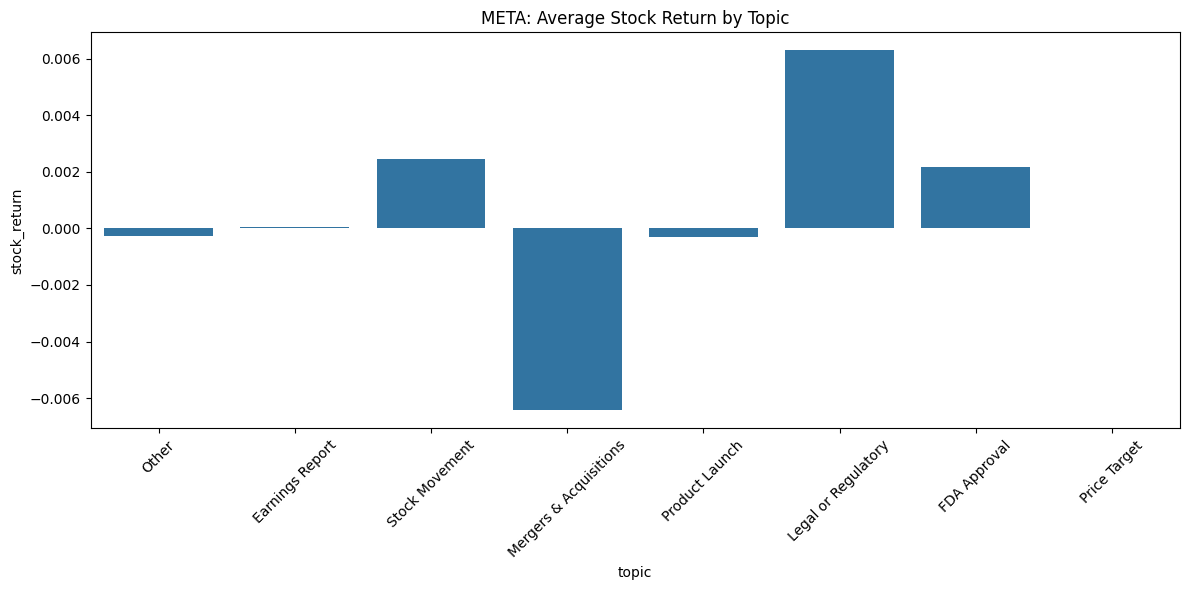

In [150]:
plot_topic_vs_return(mergeStockAndNews_meta , 'META')

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_24944\1765861326.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='topic', y='stock_return', data=dataframe, estimator='mean', ci=None)


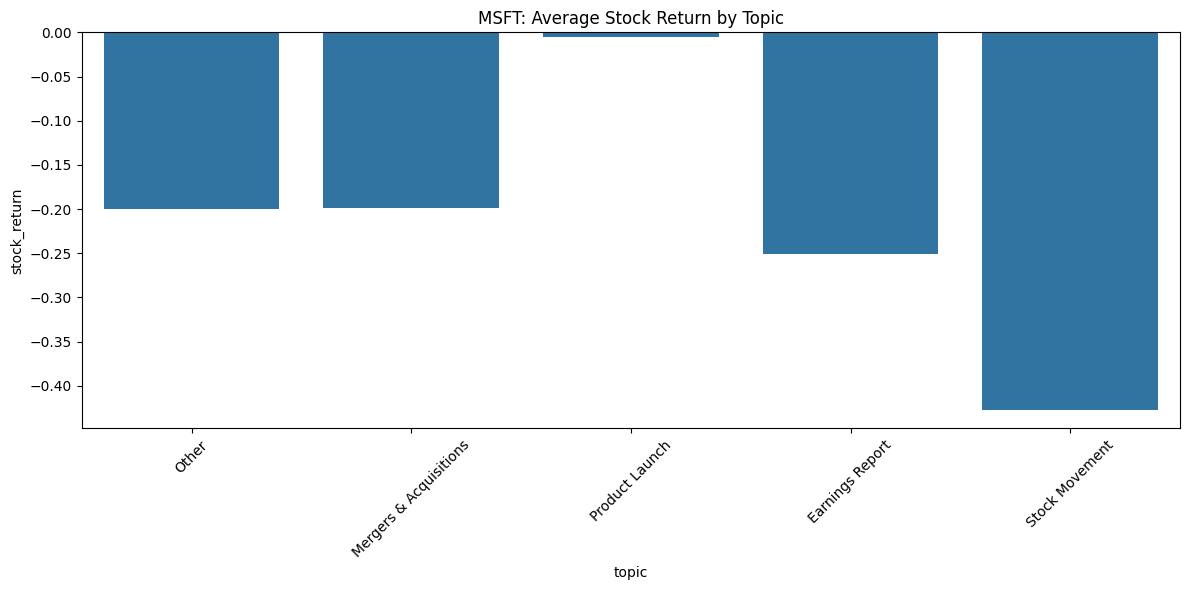

In [151]:
plot_topic_vs_return(mergeStockAndNews_msft , 'MSFT')

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_24944\1765861326.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='topic', y='stock_return', data=dataframe, estimator='mean', ci=None)


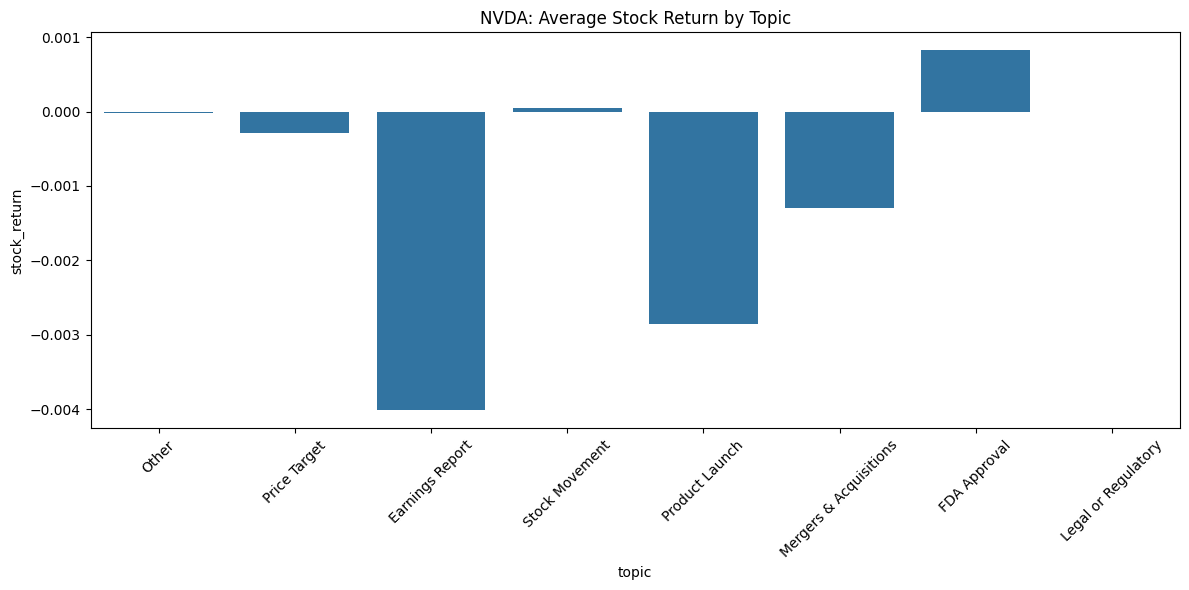

In [152]:
plot_topic_vs_return(mergeStockAndNews_nvda , 'NVDA')

In [155]:
def plot_publisher_vs_return(dataframe, stock_name):
    """
    Plots average stock return per publisher for the given dataframe.
    
    Parameters:
        dataframe (pd.DataFrame): Merged stock and news data.
        stock_name (str): Name of the stock (used in the title).
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x='publisher', y='stock_return', data=dataframe, estimator='mean', ci=None)
    plt.title(f'{stock_name.upper()}: Average Stock Return by Publisher')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_24944\3097702423.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='publisher', y='stock_return', data=dataframe, estimator='mean', ci=None)


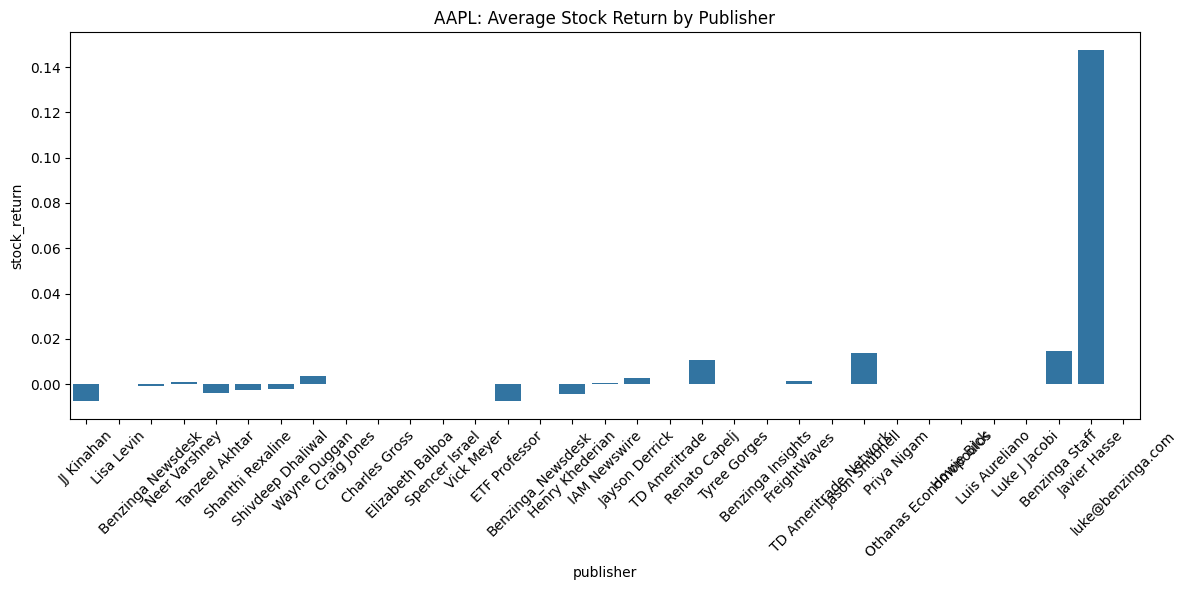

In [156]:
plot_publisher_vs_return(mergeStockAndNews_aapl, 'AAPL')

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_24944\3097702423.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='publisher', y='stock_return', data=dataframe, estimator='mean', ci=None)


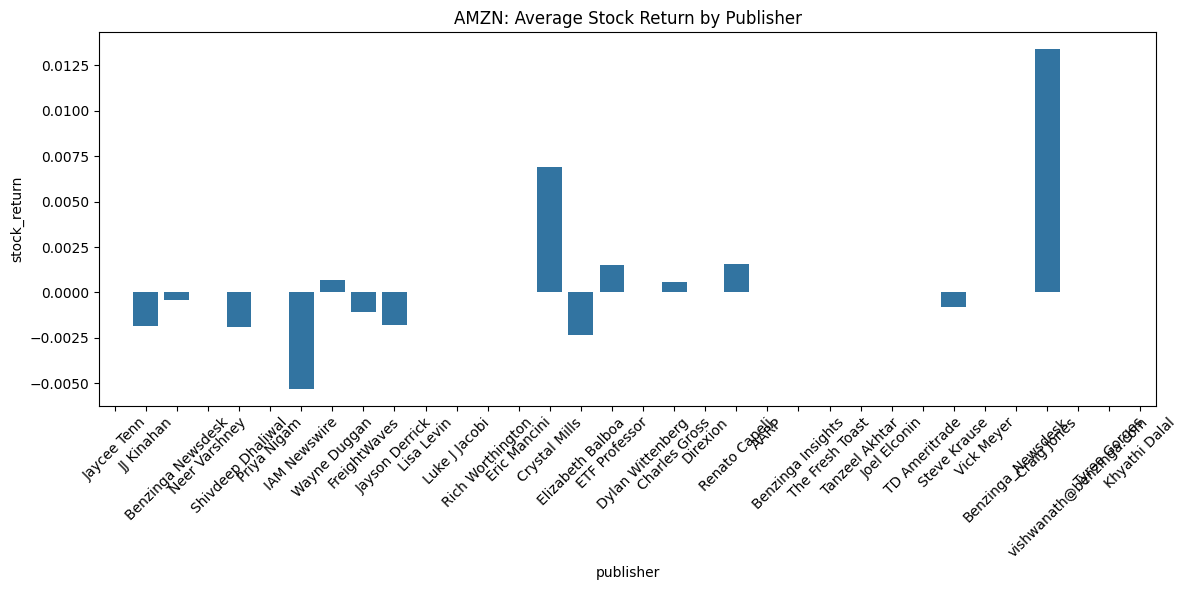

In [158]:
plot_publisher_vs_return(mergeStockAndNews_amzn , 'AMZN')

C:\Users\Sintayehu-PC\AppData\Local\Temp\ipykernel_24944\3097702423.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='publisher', y='stock_return', data=dataframe, estimator='mean', ci=None)


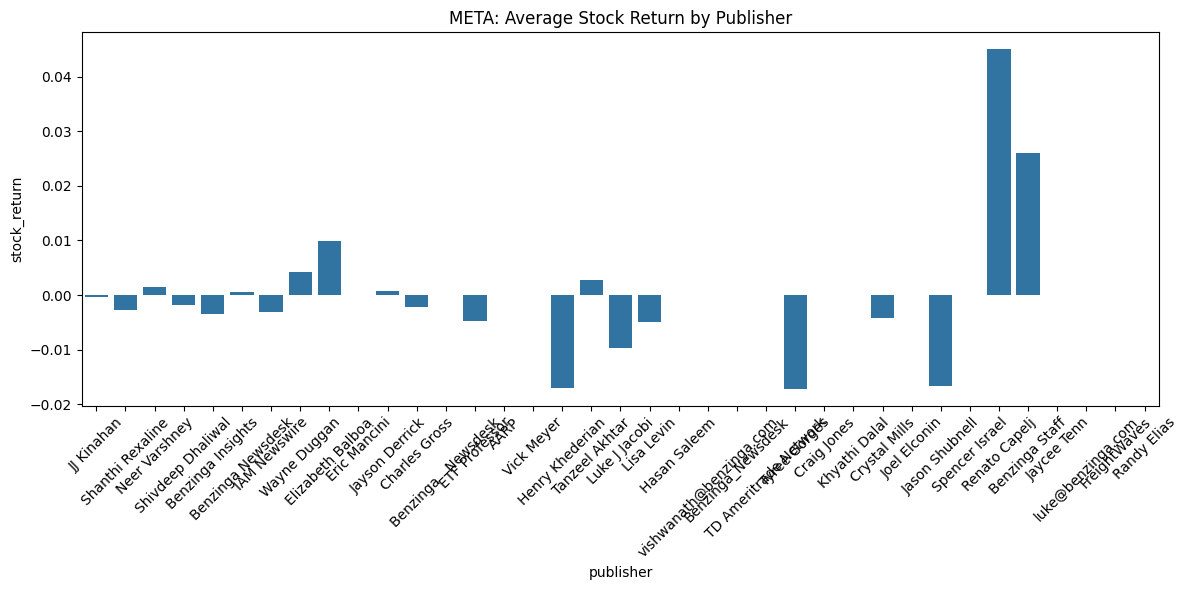

In [159]:
plot_publisher_vs_return(mergeStockAndNews_meta , 'META')